# LOAD DATA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Understanding and Cleaning data

In [5]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [8]:
crime.shape

(852950, 27)

In [9]:
crime.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [12]:
#Check Nulls
crime.isna().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [14]:
df = crime.drop(labels = ['modus_operandi', 'weapon_code', 'weapon_description', 'crime_code_2', 'crime_code_3',
                          'crime_code_4', 'cross_street'], axis = 1)
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [15]:
df.sort_values(by = 'date_reported' )

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,M,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,M,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,M,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,F,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,NaN,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,NaN,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973


In [32]:
#Update Datatypes
df['date_reported'] = pd.to_datetime(df['date_reported'], format = '%Y-%m-%d')
df['date_occurred'] = pd.to_datetime(df['date_occurred'], format='%Y-%m-%d %H:%M:%S')

In [37]:
df.describe(include = ['float64', 'int64'])

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [38]:
df['victim_age'].value_counts()

victim_age
 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [40]:
df_age = df[df['victim_age'] > 0]

In [41]:
df_age['victim_age'].value_counts()

victim_age
30     19421
35     19008
31     18603
29     18552
28     18266
       ...  
95        89
96        88
98        67
97        63
120        1
Name: count, Length: 99, dtype: int64

In [42]:
df['year'] = df['date_occurred'].dt.year
df['month'] = df['date_occurred'].dt.month

In [43]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3


# Feature understanding

<Axes: xlabel='month'>

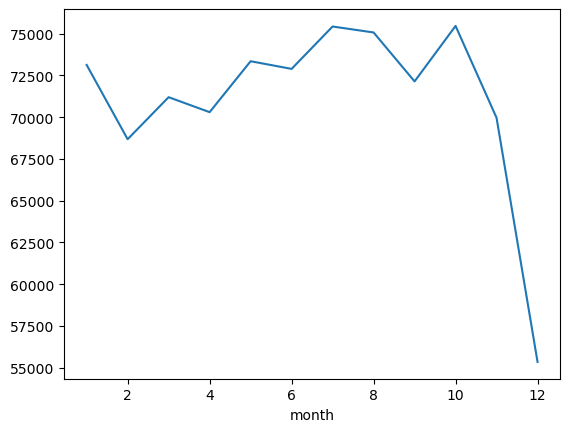

In [45]:
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

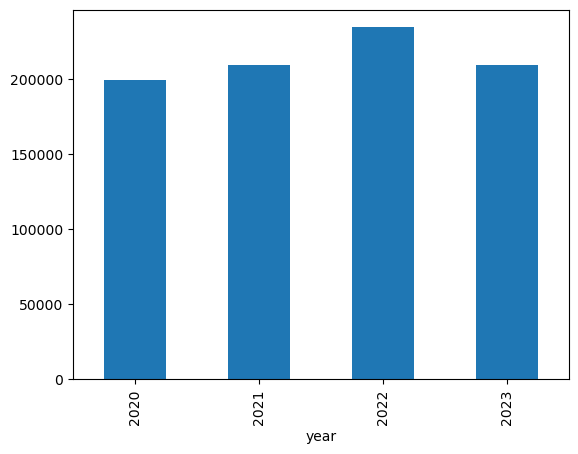

In [50]:
df['year'].value_counts().sort_index().plot(kind = 'bar')


In [51]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

In [54]:
df.sort_values(by='date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


In [55]:
df.groupby(['year', 'month']).size()

year  month
2020  1        18496
      2        17255
      3        16165
      4        15683
      5        17204
      6        17034
      7        17121
      8        16874
      9        15639
      10       16491
      11       15574
      12       15946
2021  1        16552
      2        15411
      3        16320
      4        16057
      5        16989
      6        17156
      7        18659
      8        18374
      9        18362
      10       19305
      11       18340
      12       17926
2022  1        18448
      2        17700
      3        19687
      4        19784
      5        20418
      6        20201
      7        19952
      8        20081
      9        19279
      10       20274
      11       18688
      12       19924
2023  1        19633
      2        18313
      3        19024
      4        18775
      5        18738
      6        18500
      7        19697
      8        19743
      9        18861
      10       19394
      11       17358
d

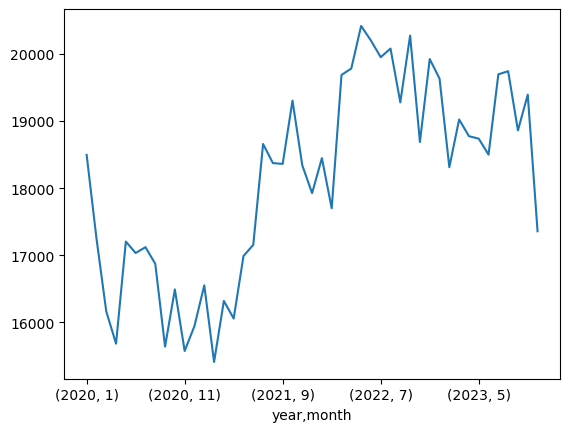

In [63]:
df.groupby(['year', 'month']).size().plot()
plt.show()

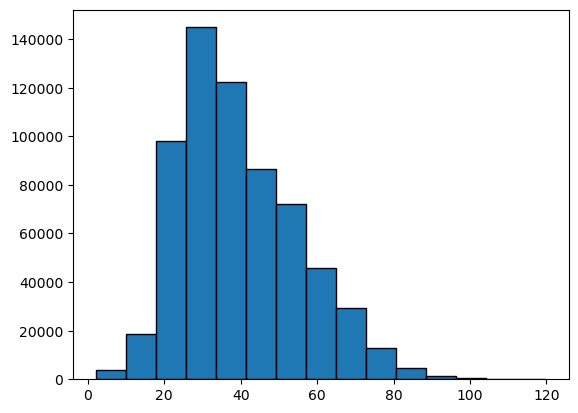

In [65]:
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)
plt.show()

In [67]:
df['date_occurred_no_time'] = df['date_occurred'].dt.date

C:\Users\osthe\AppData\Local\Temp\ipykernel_5708\2178151606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_occurred_no_time'] = df['date_occurred'].dt.date


In [68]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05


In [70]:
crime_count_per_day = df.groupby(['date_occurred_no_time', 'crime_description']).size()

In [75]:
top20 = crime_count_per_day.groupby('crime_description').mean()\
.reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [76]:
top20

,crime_description,average_daily_count
132,VEHICLE - STOLEN,63.830769
4,BATTERY - SIMPLE ASSAULT,47.432168
115,THEFT OF IDENTITY,37.331469
21,BURGLARY FROM VEHICLE,36.718182
20,BURGLARY,36.260839
129,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",36.185315
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34.114685
117,THEFT PLAIN - PETTY ($950 & UNDER),30.306993
73,INTIMATE PARTNER - SIMPLE ASSAULT,29.833566
113,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),22.954545


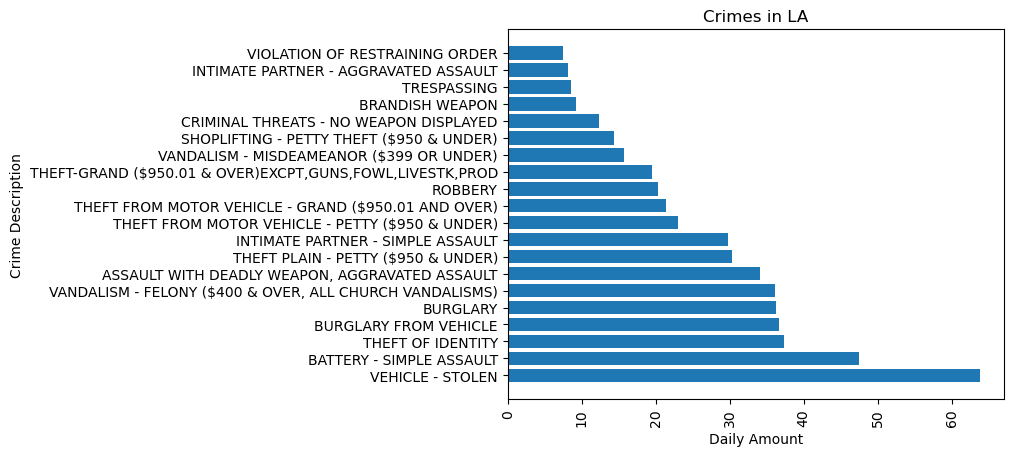

In [88]:
plt.barh(top20['crime_description'], top20['average_daily_count'])
plt.xlabel('Daily Amount')
plt.ylabel('Crime Description')
plt.title('Crimes in LA')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()

In [89]:
top20_sorted = top20.sort_values(by = 'average_daily_count', ascending = True)

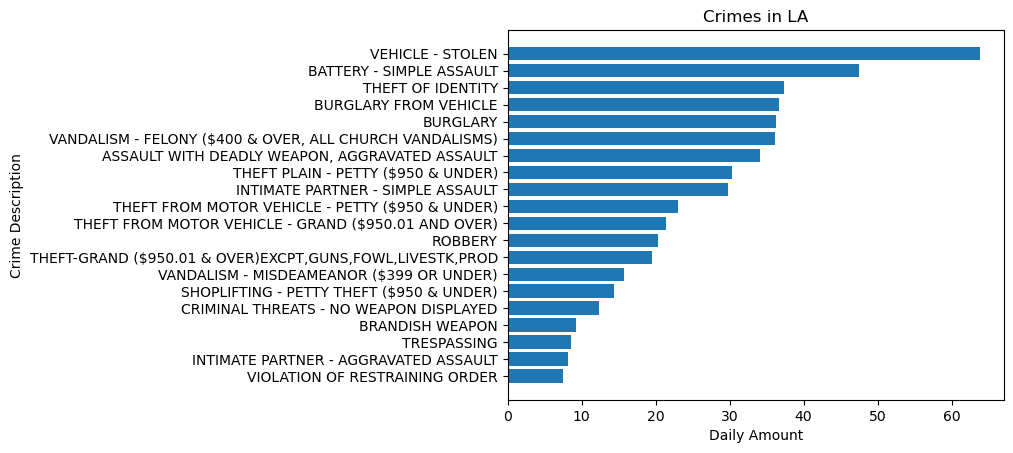

In [91]:
plt.barh(top20_sorted['crime_description'], top20_sorted['average_daily_count'])
plt.xlabel('Daily Amount')
plt.ylabel('Crime Description')
plt.title('Crimes in LA')
#plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()

In [97]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [126]:
plt.style.use('ggplot')

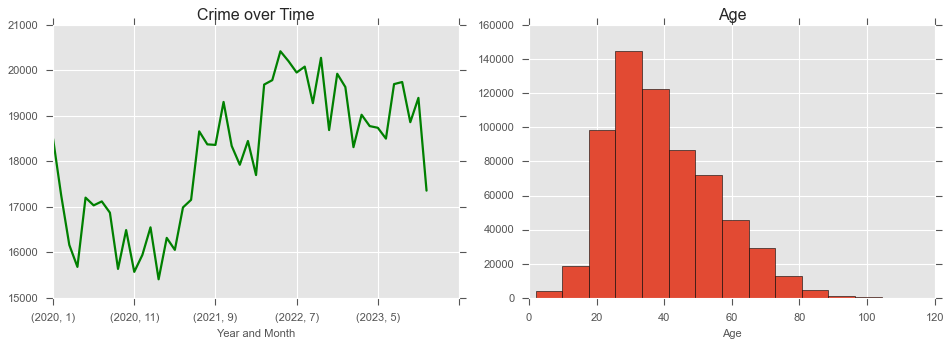

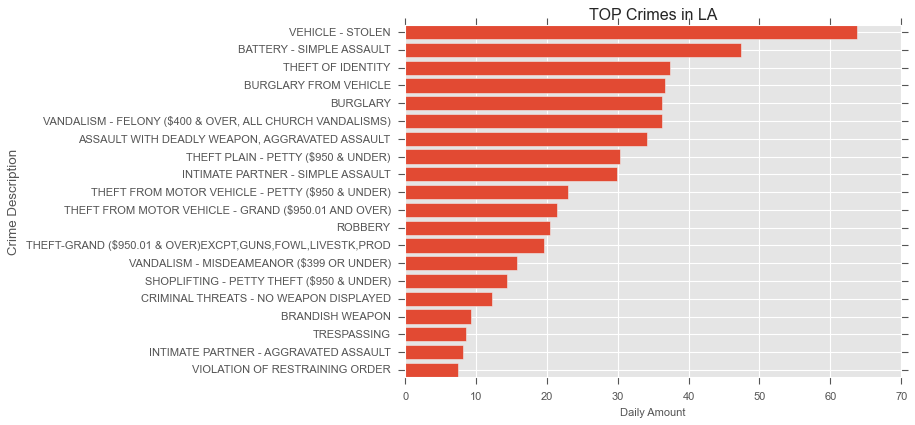

In [133]:
plt.figure(figsize = (12,8))

#PLOT 1 - LINE CHART PANDAS
plt.subplot(2,2,1)
crime_plot = df.groupby(['year', 'month']).size().plot(color = 'green', linewidth = 2)
crime_plot.set_xlabel('Year and Month', fontsize = 10)
crime_plot.set_title('Crime over Time')

#PLOT 2 - HISTOGRAM MATPLOT
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)
plt.tight_layout()
plt.xlabel('Age', fontsize = 10)
plt.title('Age')
#PLOT 3 - HORIZONTAL BAR MATPLOT
plt.figure()
plt.barh(top20_sorted['crime_description'], top20_sorted['average_daily_count'])
#plt.subplot(2,2,3)
plt.xlabel('Daily Amount', fontsize = 10)
plt.ylabel('Crime Description')
plt.title('TOP Crimes in LA')
#plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()

In [135]:
#Show the difference in reported and occurred - How long it takes to report? 
df['Time to report'] = pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])

C:\Users\osthe\AppData\Local\Temp\ipykernel_5708\1791075359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time to report'] = pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])


In [136]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,Time to report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0 days
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1 days
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61 days
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0 days
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0 days
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0 days
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1 days
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0 days


In [138]:
df['Time to report'].value_counts().head(10)

Time to report
0 days    419620
1 days    185029
2 days     52808
3 days     30894
4 days     19932
5 days     14416
6 days     10837
7 days      9722
8 days      7053
9 days      5660
Name: count, dtype: int64

In [143]:
df.groupby(['crime_description'])['Time to report'].mean().sort_values(ascending = False).head(10)

crime_description
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)   128 days 04:20:39.493670886
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                  123 days 18:41:50.471806674
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ   110 days 21:56:02.805526036
LEWD/LASCIVIOUS ACTS WITH CHILD                             97 days 07:47:31.948051948
DISHONEST EMPLOYEE ATTEMPTED THEFT                                    87 days 00:00:00
BIGAMY                                                                77 days 16:00:00
SEXUAL PENETRATION W/FOREIGN OBJECT                         66 days 02:13:50.539419087
ORAL COPULATION                                             62 days 01:53:12.452830189
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                    61 days 07:44:30.967741935
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                  59 days 15:46:14.224061484
Name: Time to report, dtype: timedelta64[ns]

In [ ]:
#Identify the top 3 crimes with the highest average victim age


In [149]:
df_age.groupby('crime_description')['victim_age'].mean().reset_index().sort_values (by = 'victim_age', ascending = False).head(10)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000
48,DOCUMENT FORGERY / STOLEN FELONY,51.890875
63,GRAND THEFT / INSURANCE FRAUD,51.714286
62,GRAND THEFT / AUTO REPAIR,51.000000
117,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",49.666667
66,ILLEGAL DUMPING,48.431818
87,"PICKPOCKET, ATTEMPT",47.500000
17,"BUNCO, GRAND THEFT",47.190796


In [ ]:
#Find the are with the highest number of crimes occurring during nighttime. 

In [152]:
nighttime_crimes = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour <= 3)]

In [155]:
nighttime_crimes['area_name'].value_counts().reset_index()

,area_name,count
0,Central,18873
1,77th Street,17568
2,Hollywood,15741
3,Pacific,15328
4,Southwest,14819
5,Southeast,14638
6,Olympic,14256
7,Newton,13843
8,N Hollywood,13428
9,Rampart,13047


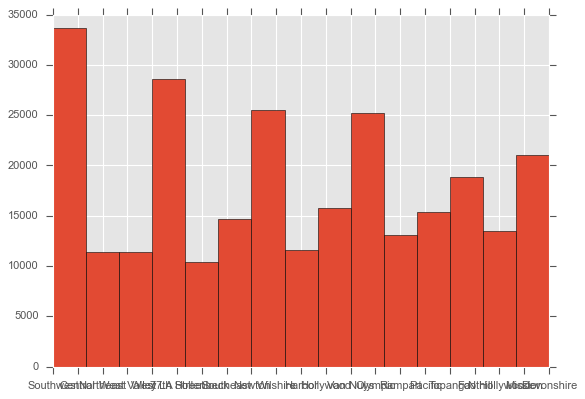

In [158]:
plt.hist(nighttime_crimes['area_name'], edgecolor = 'black', bins = 15)
plt.show()

In [181]:
hour = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

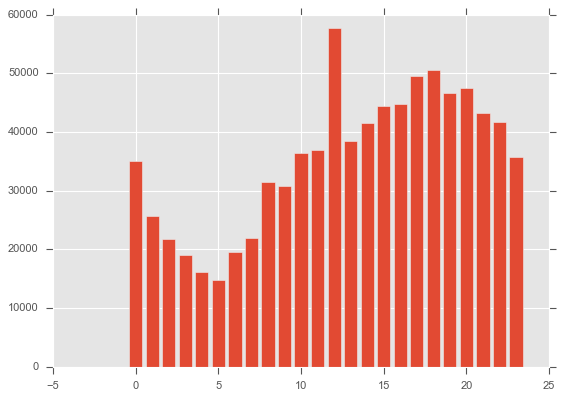

In [180]:
plt.bar(hour['date_occurred'], hour['count'])


In [179]:
df[df['date_occurred'].dt.hour == 12]['crime_description'].value_counts()

crime_description
THEFT OF IDENTITY                               9098
VEHICLE - STOLEN                                4048
BATTERY - SIMPLE ASSAULT                        3958
THEFT PLAIN - PETTY ($950 & UNDER)              3785
BURGLARY                                        2945
                                                ... 
DRUGS, TO A MINOR                                  1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)       1
BIGAMY                                             1
GRAND THEFT / INSURANCE FRAUD                      1
INCITING A RIOT                                    1
Name: count, Length: 124, dtype: int64

In [177]:
no_idtheft = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]

<BarContainer object of 24 artists>

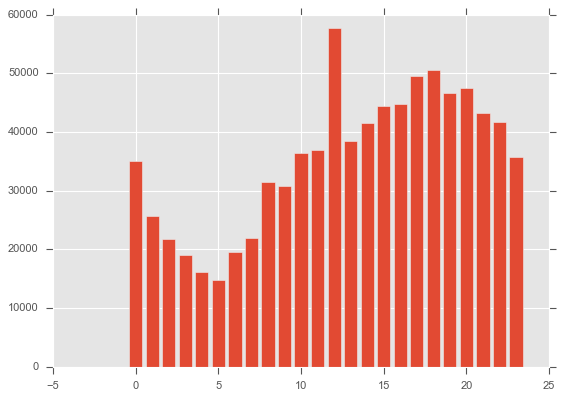

In [182]:
plt.bar(hour['date_occurred'], hour['count'])

In [183]:
new2 = no_idtheft['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

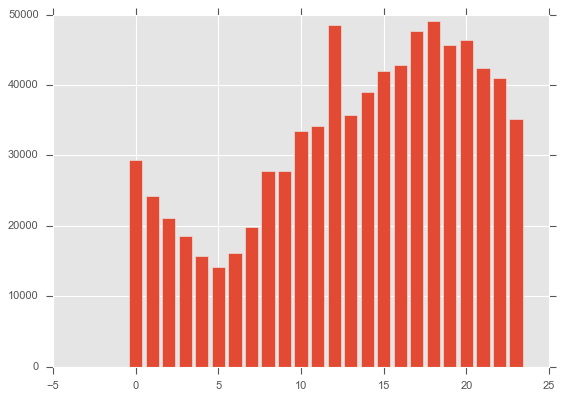

In [185]:
plt.bar(new2['date_occurred'], new2['count'])